In [152]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, classification_report

In [126]:
submissions_original = pd.read_csv('../data/submissions_no_sanitize_blank.csv').drop(['Unnamed: 0', 'selftext'], axis=1)

In [128]:
submissions_original.head()

,subreddit,title,all,tokens,lems,porter_stems,snowball_stems,word_count,title_char_count,sentences,sentence_count,avg_word_length,avg_sentence_length,sentiment
0,1,Looked up Luis Díaz's stats and Wiki..... Look...,thisisblank Looked up Luis Díaz's stats and Wi...,"['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['look', 'up', 'lui', ""díaz'"", 'stat', 'and', ...","['look', 'up', 'lui', 'díaz', 'stat', 'and', '...",22,101,"[""Looked up Luis Díaz's stats and Wiki..... Lo...",2,4.590909,11.00,0.0000
1,1,Why No Support for Our Boys in Afcon? :(,[removed]Why No Support for Our Boys in Afcon? :(,"['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['whi', 'no', 'support', 'for', 'our', 'boy', ...","['whi', 'no', 'support', 'for', 'our', 'boy', ...",9,32,"['Why No Support for Our Boys in Afcon?', ':(']",2,3.555556,4.50,-0.3400
2,1,Most valuable left wingers in the world. Opini...,thisisblank Most valuable left wingers in the ...,"['Most', 'valuable', 'left', 'wingers', 'in', ...","['Most', 'valuable', 'left', 'winger', 'in', '...","['most', 'valuabl', 'left', 'winger', 'in', 't...","['most', 'valuabl', 'left', 'winger', 'in', 't...",8,43,"['Most valuable left wingers in the world.', '...",2,5.375000,4.00,0.5256
3,1,We have some really good dancers on this team.,thisisblank We have some really good dancers o...,"['We', 'have', 'some', 'really', 'good', 'danc...","['We', 'have', 'some', 'really', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...",9,38,['We have some really good dancers on this tea...,1,4.222222,9.00,0.4927
4,1,[Fabrizio Romano] Liverpool and Porto sources ...,thisisblank [Fabrizio Romano] Liverpool and Po...,"['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...",47,244,['[Fabrizio Romano] Liverpool and Porto source...,4,5.191489,11.75,-0.6249


In [129]:
submissions_original.isnull().sum()

subreddit              0
title                  0
all                    0
tokens                 0
lems                   0
porter_stems           0
snowball_stems         0
word_count             0
title_char_count       0
sentences              0
sentence_count         0
avg_word_length        0
avg_sentence_length    0
sentiment              0
dtype: int64

In [130]:
submissions_original.shape

(57908, 14)

In [131]:
submissions_original.dropna()

,subreddit,title,all,tokens,lems,porter_stems,snowball_stems,word_count,title_char_count,sentences,sentence_count,avg_word_length,avg_sentence_length,sentiment
0,1,Looked up Luis Díaz's stats and Wiki..... Look...,thisisblank Looked up Luis Díaz's stats and Wi...,"['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['Looked', 'up', 'Luis', ""Díaz's"", 'stats', 'a...","['look', 'up', 'lui', ""díaz'"", 'stat', 'and', ...","['look', 'up', 'lui', 'díaz', 'stat', 'and', '...",22,101,"[""Looked up Luis Díaz's stats and Wiki..... Lo...",2,4.590909,11.00,0.0000
1,1,Why No Support for Our Boys in Afcon? :(,[removed]Why No Support for Our Boys in Afcon? :(,"['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['Why', 'No', 'Support', 'for', 'Our', 'Boys',...","['whi', 'no', 'support', 'for', 'our', 'boy', ...","['whi', 'no', 'support', 'for', 'our', 'boy', ...",9,32,"['Why No Support for Our Boys in Afcon?', ':(']",2,3.555556,4.50,-0.3400
2,1,Most valuable left wingers in the world. Opini...,thisisblank Most valuable left wingers in the ...,"['Most', 'valuable', 'left', 'wingers', 'in', ...","['Most', 'valuable', 'left', 'winger', 'in', '...","['most', 'valuabl', 'left', 'winger', 'in', 't...","['most', 'valuabl', 'left', 'winger', 'in', 't...",8,43,"['Most valuable left wingers in the world.', '...",2,5.375000,4.00,0.5256
3,1,We have some really good dancers on this team.,thisisblank We have some really good dancers o...,"['We', 'have', 'some', 'really', 'good', 'danc...","['We', 'have', 'some', 'really', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...","['we', 'have', 'some', 'realli', 'good', 'danc...",9,38,['We have some really good dancers on this tea...,1,4.222222,9.00,0.4927
4,1,[Fabrizio Romano] Liverpool and Porto sources ...,thisisblank [Fabrizio Romano] Liverpool and Po...,"['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[Fabrizio', 'Romano]', 'Liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...","['[fabrizio', 'romano]', 'liverpool', 'and', '...",47,244,['[Fabrizio Romano] Liverpool and Porto source...,4,5.191489,11.75,-0.6249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57903,0,Everton Boosted as Inter Reportedly Look to Se...,thisisblank Everton Boosted as Inter Reportedl...,"['Everton', 'Boosted', 'as', 'Inter', 'Reporte...","['Everton', 'Boosted', 'a', 'Inter', 'Reported...","['everton', 'boost', 'as', 'inter', 'reportedl...","['everton', 'boost', 'as', 'inter', 'report', ...",12,65,['Everton Boosted as Inter Reportedly Look to ...,1,5.416667,12.00,0.3612
57904,0,Everton-Chelsea rating results,I have a feeling this is going to illicit a fe...,"['Everton-Chelsea', 'rating', 'results']","['Everton-Chelsea', 'rating', 'result']","['everton-chelsea', 'rate', 'result']","['everton-chelsea', 'rate', 'result']",3,28,['Everton-Chelsea rating results'],1,9.333333,3.00,0.0000
57905,0,I loved the picture from that Guardian article...,thisisblank I loved the picture from that Guar...,"['I', 'loved', 'the', 'picture', 'from', 'that...","['I', 'loved', 'the', 'picture', 'from', 'that...","['i', 'love', 'the', 'pictur', 'from', 'that',...","['i', 'love', 'the', 'pictur', 'from', 'that',...",20,83,['I loved the picture from that Guardian artic...,1,4.150000,20.00,0.5994
57906,0,Blues Brothers: Phil Jagielka v Leighton Baines,thisisblank Blues Brothers: Phil Jagielka v Le...,"['Blues', 'Brothers:', 'Phil', 'Jagielka', 'v'...","['Blues', 'Brothers:', 'Phil', 'Jagielka', 'v'...","['blue', 'brothers:', 'phil', 'jagielka', 'v',...","['blue', 'brothers:', 'phil', 'jagielka', 'v',...",7,41,['Blues Brothers: Phil Jagielka v Leighton Bai...,1,5.857143,7.00,0.0000


In [132]:
X = submissions_original['title']
y = submissions_original['subreddit']

In [133]:
y.value_counts(normalize=True)

1    0.500967
0    0.499033
Name: subreddit, dtype: float64

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.20,
                                                    stratify=y,#stratify = y b/c the data = imbalanced
                                                    random_state=42)

In [139]:
pipe_svc = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('svc', SVC())
])

In [140]:
pipe_params_svc = {
    'tvec__max_features' : [30_000],
    'tvec__stop_words' : ['english'],
    'svc__C' : [0.7],
    'svc__kernel' :['rbf']
}

In [141]:
gs_svc = GridSearchCV(pipe_svc, param_grid=pipe_params_svc, cv=3, verbose = 3)

In [142]:
gs_svc.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END svc__C=0.7, svc__kernel=rbf, tvec__max_features=30000, tvec__stop_words=english; total time= 3.6min
[CV 2/3] END svc__C=0.7, svc__kernel=rbf, tvec__max_features=30000, tvec__stop_words=english; total time= 2.8min
[CV 3/3] END svc__C=0.7, svc__kernel=rbf, tvec__max_features=30000, tvec__stop_words=english; total time= 2.7min


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.7], 'svc__kernel': ['rbf'],
                         'tvec__max_features': [30000],
                         'tvec__stop_words': ['english']},
             verbose=3)

In [143]:
gs_svc.best_estimator_

Pipeline(steps=[('tvec',
                 TfidfVectorizer(max_features=30000, stop_words='english')),
                ('svc', SVC(C=0.7))])

In [144]:
gs_model_svc = gs_svc.best_estimator_

In [146]:
gs_model_svc.score(X_train, y_train)

0.9592885204852567

In [147]:
gs_model_svc.score(X_test, y_test)

0.860386807114488

In [148]:
def conmat(y_test, preds, classes):

    conmat = confusion_matrix(y_test, preds)
    print(f'Accuracy Score: {accuracy_score(y_test, preds)}')
    return pd.DataFrame(conmat, columns=['Predicted ' +class_ for class_ in classes], \
                index=['Actual '+ class_ for class_ in classes])

preds = gs_svc.best_estimator_.predict(X_test)

conmat(y_test, preds, ['Liverpool', 'Everton'])

Accuracy Score: 0.860386807114488


,Predicted Liverpool,Predicted Everton
Actual Liverpool,4910,870
Actual Everton,747,5055


In [150]:
# Get predictions
preds = gs_model_svc.predict(X_test)
# Save confusion matrix values
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

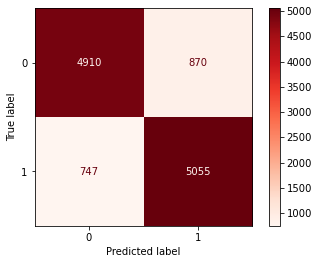

In [153]:
# View confusion matrix
plot_confusion_matrix(gs_model_svc, X_test,y_test,cmap='Reds',values_format='d');

In [151]:
#Recall Rate or Sensitivity
#Percentage of true positives gotten correct
recall = tp/(tp + fn)
print(f'Recall: {round(recall,2)}')

#Precision
#Poportion of correct that are actually correct
precision = tp / (tp+fp)
print(f'Precision: {round(precision,2)}')

 # Calculate the specificity TRUE NEG RATE
#percentage of true negatives gotten correct
specificity = tn/ (tn+fp)
print(f'Specificity: {round(specificity,2)}')

#the mean of precision and recall.
#mean of proportion that are predicted actually positive correctly and actually negative correctly
f1_score = (2*precision*recall)/ (precision + recall)
print(f'F1_Score: {round(f1_score,2)}')

Recall: 0.87
Precision: 0.85
Specificity: 0.85
F1_Score: 0.86
